In [1]:
using CSV
using Dates
using DelimitedFiles 
using NCDatasets
using PyPlot
using DIVAnd
using Statistics
const plt=PyPlot
using PyCall
using PyPlot
using TOML
using GeoArrays
const plt = PyPlot
colors = PyCall.pyimport("matplotlib.colors")
mticker = PyCall.pyimport("matplotlib.ticker")
cmocean = PyCall.pyimport("cmocean")
plt.rc("font", family="Times New Roman", size=16)
include("../src/InterpCalanus.jl")
include("../src/PlottingCalanus.jl")

Main.PlottingCalanus

In [14]:
config = TOML.parsefile("./config.ini")
dom = config["domain"]
mycolor = "#6667AB"
mycolor2 = "#456A30" # Green treetop

"#456A30"

In [3]:
resdir = config["directories"]["resdir"]
figdir = config["directories"]["figdir"]
isdir("resdir") ? @debug("already there") : mkpath("resdir")
isdir(figdir) ? @debug("already there") : mkpath(figdir)
datadir = config["directories"]["datadir"]
datafile = joinpath(datadir, config["files"]["datafile"])
isfile(datafile) ? @debug("already downloaded") : download(config["files"]["datafileURL"], datafile)

## Reading monthly and yearly results

In [4]:
resfile_yearmonth_fidmarchicus = joinpath(resdir, "calanus_finmarchicus_year_month.nc")
resfile_yearmonth_helgolandicus = joinpath(resdir, "calanus_helgolandicus_year_month.nc")
resfile_year_fidmarchicus = joinpath(resdir, "calanus_finmarchicus_year.nc")
resfile_year_helgolandicus = joinpath(resdir, "calanus_helgolandicus_year.nc")

"../results/L05/calanus_helgolandicus_year.nc"

In [5]:
function read_results(resfile::String)
    NCDataset(resfile, "r") do ds
        lon = ds["lon"][:]
        lat = ds["lat"][:]
        times = ds["time"][:]
        field = ds["abundance"][:]
        error = ds["error"][:]
        
        return lon::Vector{Union{Missing, Float32}}, lat::Vector{Union{Missing, Float32}}, 
            times::Vector{DateTime}, 
            field::Array{Union{Missing, Float64}, 3}, 
            error::Array{Union{Missing, Float64}, 3}
    end
end

read_results (generic function with 1 method)

In [52]:
lonyear_fid, lat_year_fid, times_year, field_year_fid, error_year = read_results(resfile_year_fidmarchicus)
_, _, _, field_year_helgo, _ = read_results(resfile_year_helgolandicus);
_, _, times_month, field_yearmonth_fid, error_month = read_results(resfile_yearmonth_fidmarchicus);
_, _, _, field_yearmonth_helgo, _ = read_results(resfile_yearmonth_helgolandicus);

In [53]:
yearlist = Dates.year.(times_year);

In [7]:
function compute_time_mean(field::Array{Union{Missing, Float64}, 3})
    nlon, nlat, ntimes = size(field)
    fieldmean = zeros(ntimes)
    for itt = 1:ntimes
        fieldmean[itt] = mean(filter(!isnan, field[:,:,itt]))
    end
    return fieldmean
end

compute_time_mean (generic function with 1 method)

In [54]:
fmean1 = compute_time_mean(field_year_fid)
fmean2 = compute_time_mean(field_year_helgo)
fmean3 = compute_time_mean(field_yearmonth_fid)
fmean4 = compute_time_mean(field_yearmonth_helgo);

In [58]:
fmean3

720-element Vector{Float64}:
  0.8035978365396298
  0.4698745063687062
  5.323207707905789
 12.070463215930506
 15.596879366828283
  6.655781821967966
  6.103981387915865
  3.5742864231978015
  2.5281533468739124
  1.3658905264288026
  0.854951757064339
  0.13418862940893758
  0.5149158932335632
  ⋮
  0.2667472462248913
  0.7203291253882542
  2.175869234756682
  9.122010337101417
  3.3369168920463435
  5.493815144581288
 26.352638865568117
  4.9417047087608275
  1.4937668616335331
  4.345945316484545
  1.0584821324075537
  0.3322692933390326

## Make plots
### Years

In [55]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.plot(times_year, fmean1, "ko-", markersize=2, label="Calanus finmarchicus")
ax.plot(times_year, fmean2, "o-", linewidth=2, color=mycolor, markersize=2, label="Calanus helgolandicus")
ax.plot(times_year[argmax(fmean1)], maximum(fmean1), "ko", ms=7)
ax.text(times_year[argmax(fmean1)], maximum(fmean1), ha="left", va="bottom", 
    " $(round(maximum(fmean1), digits=1))\n($(yearlist[argmax(fmean1)]))")

ax.text(times_year[argmax(fmean2)], maximum(fmean2), ha="left", va="bottom", 
    " $(round(maximum(fmean2), digits=1))\n($(yearlist[argmax(fmean2)]))", color=mycolor)

ax.text(times_year[end], fmean1[end], " Calanus fidmarchicus", va="center")
ax.text(times_year[end], fmean2[end], " Calanus helgolandicus", color=mycolor, va="center")
ax.set_ylabel("Mean\nabundance", rotation=0, ha="right", fontsize=18)
#plt.savefig(joinpath(figdir, "time_series_year"), dpi=300, bbox_inches="tight")

LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

### Months

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


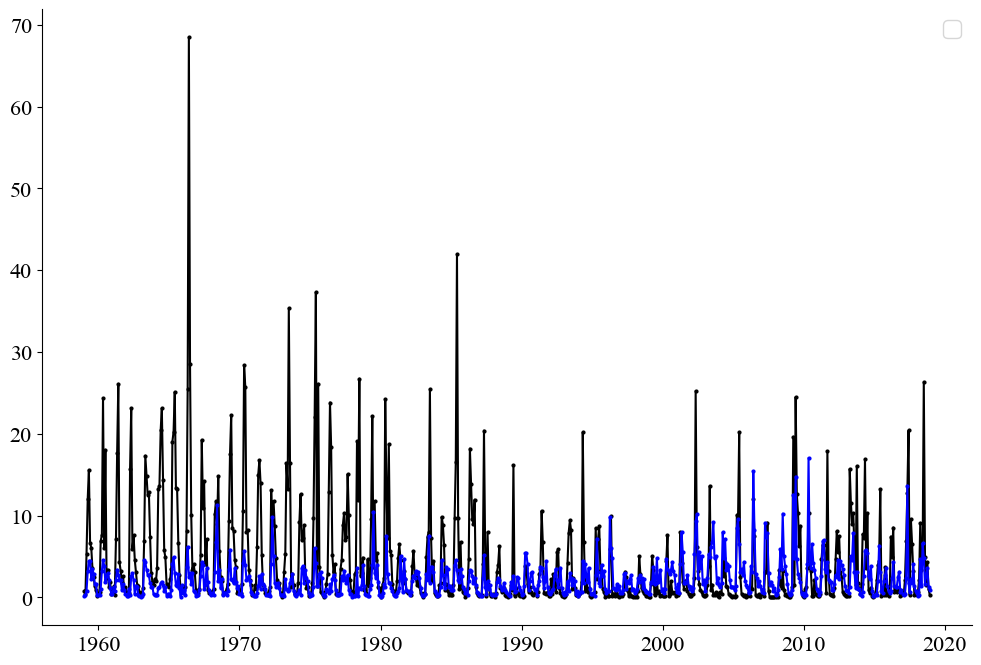

PyObject <matplotlib.legend.Legend object at 0x7fe6674cc3a0>

In [56]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
#ax.plot(times_year, fmean1, "ko-", markersize=2, label="Calanus fidmarchicus")
#ax.plot(times_year, fmean2, "bo-", markersize=2, label="Calanus helgolandicus")
ax.plot(times_month, fmean3, "ko-", markersize=2)
ax.plot(times_month, fmean4, "bo-", markersize=2)
plt.legend()